In [3]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime

In [7]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

## Commodities Ratio's From 2010  to 2020
#### Examples can help to visualize the cheapest and best opportunity for commodities investment

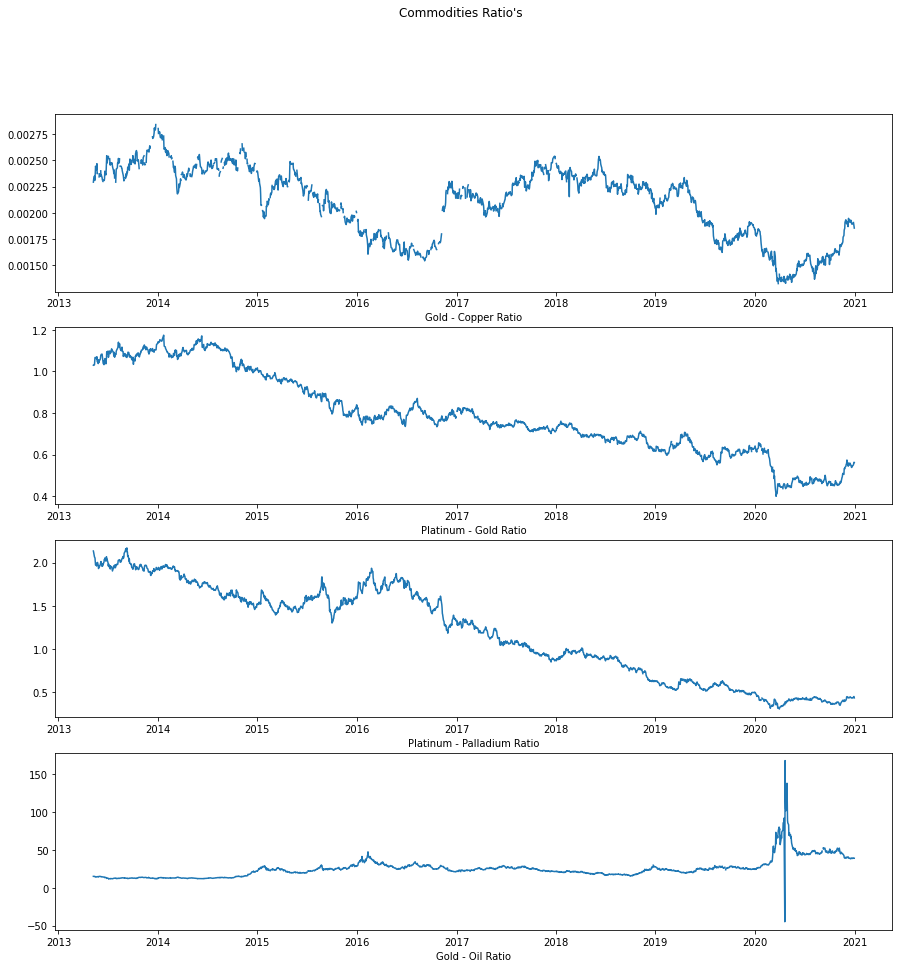

In [6]:
dt = te.fetchMarkets(symbol=['XAUUSD:CUR', 'HG1:COM', 'XPTUSD:CUR','XPDUSD:CUR', 'CL1:COM'], initDate='2010-01-01', endDate='2020-12-31', output_type='df')

dt_gold = dt.query('Symbol == "XAUUSD:CUR" ' )
dt_copper = dt.query('Symbol == "HG1:COM"')
dt_platinum = dt.query('Symbol == "XPTUSD:CUR"')
dt_palladium = dt.query('Symbol == "XPDUSD:CUR"')
dt_oil = dt.query('Symbol == "CL1:COM"')

dt['Date'] = pd.to_datetime(dt['Date'], format='%d/%m/%Y')

dt_pivot = dt.pivot(index='Date', columns='Symbol', values='Close')
dt_pivot

copper_gold_ratio = dt_pivot['HG1:COM'] / dt_pivot['XAUUSD:CUR'] 
platinum_gold_ratio = dt_pivot['XPTUSD:CUR'] / dt_pivot['XAUUSD:CUR']
platinum_palladium_ratio = dt_pivot['XPTUSD:CUR'] / dt_pivot['XPDUSD:CUR']
gold_oil_ratio = dt_pivot['CL1:COM'] / dt_pivot['XAUUSD:CUR']

fig, (ax2, ax3,ax4, ax5) = plt.subplots(4, 1, figsize=(15, 15))
fig.suptitle("Commodities Ratio's")

ax2.plot(copper_gold_ratio, label='Gold-Copper Ratio')
ax2.set_xlabel('Gold - Copper Ratio')


ax3.plot(platinum_gold_ratio, label='Platinum-Gold Ratio')
ax3.set_xlabel('Platinum - Gold Ratio')


ax4.plot(platinum_palladium_ratio)
ax4.set_xlabel('Platinum - Palladium Ratio')


ax5.plot(gold_oil_ratio)
ax5.set_xlabel('Gold - Oil Ratio')

plt.show()
